<h1>Churn Prediction</h1>


<h3>Loading Libraries and Data</h3>

In [61]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
import matplotlib.ticker as mtick
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [62]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.columns.values 

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [15]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [16]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.dropna(inplace=True)

## Data Visualization

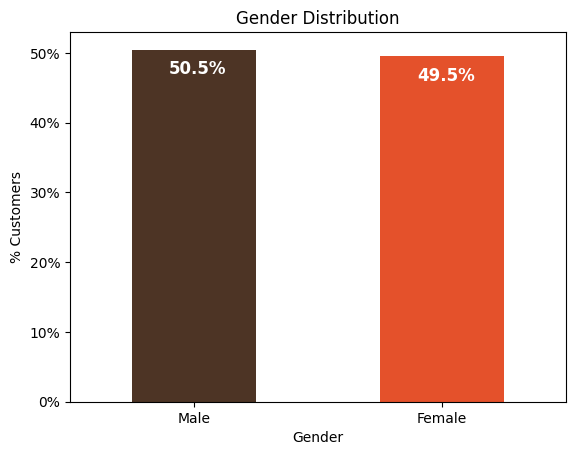

In [67]:

colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

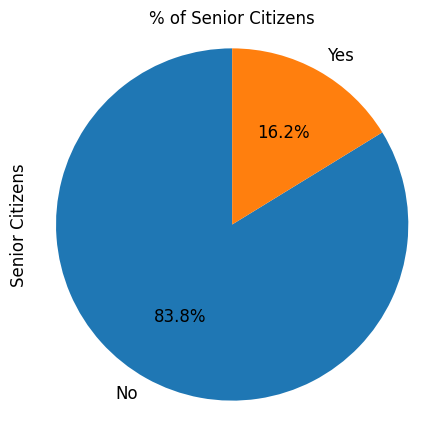

In [68]:
# Calculate the percentages
senior_citizen_counts = df['SeniorCitizen'].value_counts()
percentages = senior_citizen_counts * 100.0 / len(df)
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(percentages, labels=['No', 'Yes'], autopct='%.1f%%', startangle=90, textprops={'fontsize': 12})

# Set the y-axis label
ax.set_ylabel('Senior Citizens', fontsize=12)

# Set the chart title
ax.set_title('% of Senior Citizens', fontsize=12)

# Set the y-axis tick format as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Equal aspect ratio to ensure a circular pie chart
ax.axis('equal')

# Show the plot
plt.show()

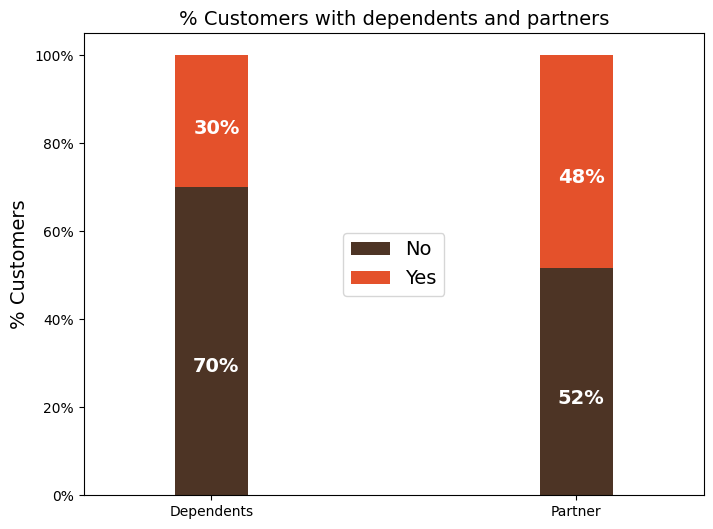

In [72]:


df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])

df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

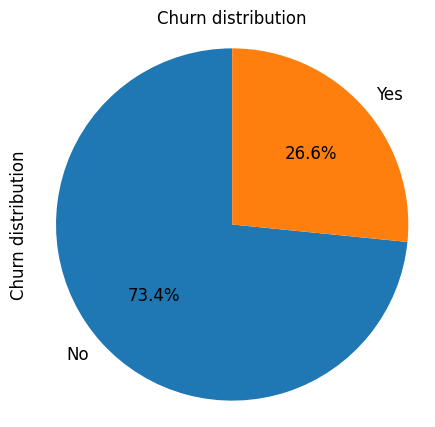

In [89]:
senior_citizen_counts = df['Churn'].value_counts()
percentages = senior_citizen_counts * 100.0 / len(df)
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(percentages, labels=['No', 'Yes'], autopct='%.1f%%', startangle=90, textprops={'fontsize': 12})

# Set the y-axis label
ax.set_ylabel('Churn distribution', fontsize=12)

# Set the chart title
ax.set_title('Churn distribution', fontsize=12)

# Set the y-axis tick format as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Equal aspect ratio to ensure a circular pie chart
ax.axis('equal')

# Show the plot
plt.show()

In [94]:
fig =px.histogram(df,x="Churn" ,color="Contract",barmode="group",title="<b>Customer contract distribution<b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [219]:
label=df["PaymentMethod"].unique()
values=df["PaymentMethod"].value_counts()
fig=go.Figure(data=[go.Pie(labels=label,values=values,hole=.3)])
fig.show()

In [223]:
fig=go.Figure()
fig.add_trace(go.Bar(
      x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()


In [227]:
fig=px.histogram(df,x="Churn",color="Dependents",barmode="group", title="<b>Dependents distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [4]:
df.drop("customerID",axis=1,inplace=True)
 

## Label Encoder 
<p>to change the data into int value</p>

In [5]:
cols = ('gender', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService','OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'PaperlessBilling', 'PaymentMethod','Contract',"OnlineBackup",'Churn')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Model Prediction

In [47]:
X=df.drop('Churn',axis=1)
y=df["Churn"]
# smote = SMOTE()
# X,y = smote.fit_resample(X,y)



### Split The Data

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [49]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 73.30%
Leaving Rate: 26.70%
===============TEST=================
Staying Rate: 73.70%
Leaving Rate: 26.30%


### Model Training

In [50]:
logistic=make_pipeline(RobustScaler(),LogisticRegression())
logistic.fit(X_train,y_train)
y_train_pred=logistic.predict(X_train)
y_test_pred=logistic.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.804754164973588
Accuracy Score on test data:  0.8


In [51]:
# estimator = 
# parameters = {
#     'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]
# }
 
xgb=make_pipeline(RobustScaler(),XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    max_depth=4,
    n_estimators=100,
    learning_rate=0.1
    
))
xgb.fit(X_train,y_train)
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8364485981308412
Accuracy Score on test data:  0.8018957345971564


In [53]:
dt=make_pipeline(RobustScaler(),DecisionTreeClassifier(random_state=40,max_depth=7, min_samples_split=42))
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8216172287687932
Accuracy Score on test data:  0.7886255924170616


In [54]:
svm=make_pipeline(RobustScaler(),SVC())
svm.fit(X_train,y_train)
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8175538399024787
Accuracy Score on test data:  0.7976303317535545


In [55]:
abc=make_pipeline(RobustScaler(),AdaBoostClassifier())
abc.fit(X_train,y_train)
y_train_pred=abc.predict(X_train)
y_test_pred=abc.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8086143843965867
Accuracy Score on test data:  0.8009478672985783


In [56]:
gbc=make_pipeline(RobustScaler(),GradientBoostingClassifier())
gbc.fit(X_train,y_train)
y_train_pred=gbc.predict(X_train)
y_test_pred=gbc.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8321820398212109
Accuracy Score on test data:  0.8018957345971564


In [64]:
rf=make_pipeline(RobustScaler(),RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, 
                                  max_leaf_nodes = 30))
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8212108898821617
Accuracy Score on test data:  0.7981042654028436


## Choosing The Best Model

In [58]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('xgb', xgb),("abc",abc),("gbc",gbc)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8033175355450237


In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.66      0.51      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



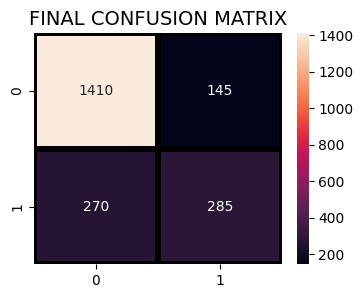

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()